In [1]:
#importing the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Input, Embedding, Dense, GlobalMaxPooling1D,Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt

In [2]:
#importing the dataset
content = open('content0003.json' , encoding='utf-8')
data1 = json.load(content)

In [3]:
#getting all the data to lists
tags = []
inputs = []
responses = {}
for intent in data1['intents']:
    responses[intent['tag']]=intent['responses']
    for lines in intent['input']:
        inputs.append(lines)
        tags.append(intent['tag'])

In [4]:
#converting to dataframe
data = pd.DataFrame({"input":inputs,"tag":tags})

In [5]:
#printing the data
data

,input,tag
0,හෙලෝ මැණිකේ!,greeting
1,හායි මැණිකේ!,greeting
2,ආයුබෝවන්,greeting
3,ආයුබෝවන් මැණිකේ,greeting
4,හෙලෝ,greeting
...,...,...
150,මට කැමරාව ඕනේ,opencamera
151,කැමරා ඇප් එකට යන්න,opencamera
152,open camera,opencamera
153,I want to take a selfie,opencamera


In [6]:
#removing punctuations
import string
data['input'] = data['input'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['input'] = data['input'].apply(lambda wrd: ''.join(wrd))
data

,input,tag
0,හෙලෝ මැණිකේ,greeting
1,හායි මැණිකේ,greeting
2,ආයුබෝවන්,greeting
3,ආයුබෝවන් මැණිකේ,greeting
4,හෙලෝ,greeting
...,...,...
150,මට කැමරාව ඕනේ,opencamera
151,කැමරා ඇප් එකට යන්න,opencamera
152,open camera,opencamera
153,i want to take a selfie,opencamera


In [7]:
#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['input'])
train = tokenizer.texts_to_sequences(data['input'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tag'])

In [8]:
input_shape = x_train.shape[1]
print(input_shape)

7


In [9]:
#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ",vocabulary)
output_length = le.classes_.shape[0]
print("output length: ",output_length)

number of unique words :  114
output length:  11


In [10]:
def get_model():
    #creating the model
    i = Input(shape=(input_shape,))
    x = Embedding(vocabulary+1,10)(i)
    x = LSTM(10,return_sequences=True)(x)
    x = Flatten()(x)
    x = Dense(output_length,activation="softmax")(x)
    model = Model(i,x)
    return model

In [11]:
model = get_model()

In [12]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [13]:
#training the model
train = model.fit(x_train,y_train,epochs=200)

Epoch 1/200
5/5 [==============================] - 2s 4ms/step - loss: 2.3939 - accuracy: 0.1871
Epoch 2/200
5/5 [==============================] - 0s 5ms/step - loss: 2.3867 - accuracy: 0.2129
Epoch 3/200
5/5 [==============================] - 0s 5ms/step - loss: 2.3795 - accuracy: 0.1935
Epoch 4/200
5/5 [==============================] - 0s 5ms/step - loss: 2.3705 - accuracy: 0.1935
Epoch 5/200
5/5 [==============================] - 0s 4ms/step - loss: 2.3595 - accuracy: 0.1935
Epoch 6/200
5/5 [==============================] - 0s 4ms/step - loss: 2.3484 - accuracy: 0.1935
Epoch 7/200
5/5 [==============================] - 0s 5ms/step - loss: 2.3331 - accuracy: 0.1935
Epoch 8/200
5/5 [==============================] - 0s 4ms/step - loss: 2.3164 - accuracy: 0.1935
Epoch 9/200
5/5 [==============================] - 0s 5ms/step - loss: 2.2970 - accuracy: 0.1935
Epoch 10/200
5/5 [==============================] - 0s 4ms/step - loss: 2.2738 - accuracy: 0.1935
Epoch 11/200
5/5 [===========

5/5 [==============================] - 0s 3ms/step - loss: 0.5306 - accuracy: 0.8903
Epoch 85/200
5/5 [==============================] - 0s 3ms/step - loss: 0.5192 - accuracy: 0.8968
Epoch 86/200
5/5 [==============================] - 0s 3ms/step - loss: 0.5094 - accuracy: 0.9097
Epoch 87/200
5/5 [==============================] - 0s 3ms/step - loss: 0.4930 - accuracy: 0.9032
Epoch 88/200
5/5 [==============================] - 0s 4ms/step - loss: 0.4836 - accuracy: 0.9097
Epoch 89/200
5/5 [==============================] - 0s 4ms/step - loss: 0.4728 - accuracy: 0.9226
Epoch 90/200
5/5 [==============================] - 0s 4ms/step - loss: 0.4644 - accuracy: 0.9226
Epoch 91/200
5/5 [==============================] - 0s 5ms/step - loss: 0.4544 - accuracy: 0.9290
Epoch 92/200
5/5 [==============================] - 0s 4ms/step - loss: 0.4434 - accuracy: 0.9226
Epoch 93/200
5/5 [==============================] - 0s 3ms/step - loss: 0.4361 - accuracy: 0.9290
Epoch 94/200
5/5 [===============

5/5 [==============================] - 0s 4ms/step - loss: 0.1252 - accuracy: 1.0000
Epoch 168/200
5/5 [==============================] - 0s 4ms/step - loss: 0.1237 - accuracy: 1.0000
Epoch 169/200
5/5 [==============================] - 0s 4ms/step - loss: 0.1220 - accuracy: 1.0000
Epoch 170/200
5/5 [==============================] - 0s 4ms/step - loss: 0.1197 - accuracy: 1.0000
Epoch 171/200
5/5 [==============================] - 0s 4ms/step - loss: 0.1184 - accuracy: 1.0000
Epoch 172/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1172 - accuracy: 1.0000
Epoch 173/200
5/5 [==============================] - 0s 4ms/step - loss: 0.1155 - accuracy: 1.0000
Epoch 174/200
5/5 [==============================] - 0s 4ms/step - loss: 0.1146 - accuracy: 1.0000
Epoch 175/200
5/5 [==============================] - 0s 3ms/step - loss: 0.1123 - accuracy: 1.0000
Epoch 176/200
5/5 [==============================] - 0s 4ms/step - loss: 0.1108 - accuracy: 1.0000
Epoch 177/200
5/5 [=====

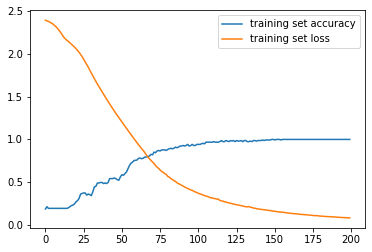

In [14]:
#plotting model accuracy
plt.plot(train.history['accuracy'],label='training set accuracy')
plt.plot(train.history['loss'],label='training set loss')
plt.legend()

In [15]:
#Saving model
import os.path
if os.path.isfile("Manike - 0.21") is False:
    model.save("Manike003.h5")

In [16]:
# Testing Model
# chatting
import random
from tensorflow import keras


#Loading model
reconstructed_model = keras.models.load_model("Manike003.h5")


while True:
    texts_p = []
    prediction_input = input('You : ')
    
    #removing punctuation and converting to lowercase
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)
    
    #tokenizing and padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input],input_shape)
    
    
    #getting output from model
    output = reconstructed_model.predict(prediction_input)
    output = output.argmax()
    
    #finding the right tag and predicting
    response_tag = le.inverse_transform([output])[0]
    print("Manike :",random.choice(responses[response_tag]))
    if response_tag == "goodbye":
        break

You : කෝල් එකක් ගන්න


InvalidArgumentError: Graph execution error:

Detected at node 'model_7/embedding_7/embedding_lookup' defined at (most recent call last):
    File "C:\ProgramData\Anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\ProgramData\Anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 846, in launch_instance
      app.start()
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 677, in start
      self.io_loop.start()
    File "C:\ProgramData\Anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\ProgramData\Anaconda3\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\ProgramData\Anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 353, in dispatch_shell
      await result
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\ProgramData\Anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2901, in run_cell
      result = self._run_cell(
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3172, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "C:\Users\Geethan\AppData\Local\Temp/ipykernel_33612/3573572716.py", line 27, in <module>
      output = reconstructed_model.predict(prediction_input)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1982, in predict
      tmp_batch_outputs = self.predict_function(iterator)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1801, in predict_function
      return step_function(self, iterator)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1790, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1783, in run_step
      outputs = model.predict_step(data)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\training.py", line 1751, in predict_step
      return self(x, training=False)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py", line 451, in call
      return self._run_internal_graph(
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\functional.py", line 589, in _run_internal_graph
      outputs = node.layer(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\engine\base_layer.py", line 1096, in __call__
      outputs = call_fn(inputs, *args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 92, in error_handler
      return fn(*args, **kwargs)
    File "C:\ProgramData\Anaconda3\lib\site-packages\keras\layers\embeddings.py", line 197, in call
      out = tf.nn.embedding_lookup(self.embeddings, inputs)
Node: 'model_7/embedding_7/embedding_lookup'
indices[0,4] = 113 is not in [0, 89)
	 [[{{node model_7/embedding_7/embedding_lookup}}]] [Op:__inference_predict_function_9063]